In [2]:
# Importing the Necessary Libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [3]:
data = pd.read_csv('minute_weather.csv')
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,10/09/2011 00:00,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,10/09/2011 00:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,10/09/2011 00:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,10/09/2011 00:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,10/09/2011 00:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


Minute Weather Data Description


The minute weather dataset comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file minute_weather.csv, which is a comma-separated file.
As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row in minute_weather.csv contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

rowID: unique number for each row (Unit: NA)
hpwren_timestamp: timestamp of measure (Unit: year-month-day hour:minute:second)
air_pressure: air pressure measured at the timestamp (Unit: hectopascals)
air_temp: air temperature measure at the timestamp (Unit: degrees Fahrenheit)
avg_wind_direction: wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from the North, and increasing clockwise)
avg_wind_speed: wind speed averaged over the minute before the timestamp (Unit: meters per second)
max_wind_direction: highest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and increasing clockwise)
max_wind_speed: highest wind speed in the minute before the timestamp (Unit: meters per second)
min_wind_direction: smallest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and inceasing clockwise)
min_wind_speed: smallest wind speed in the minute before the timestamp (Unit: meters per second)
rain_accumulation: amount of accumulated rain measured at the timestamp (Unit: millimeters)
rain_duration: length of time rain has fallen as measured at the timestamp (Unit: seconds)
relative_humidity: relative humidity measured at the timestamp (Unit: percent)

In [4]:
data.shape

(1048575, 13)

In [5]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(104858, 13)

In [6]:
sampled_df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.048580e+05,104858.000000,104858.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104857.000000,104857.000000,104858.000000
mean,5.242850e+05,916.896735,60.882900,161.828316,2.750766,162.626335,3.370356,166.937738,2.118886,0.000318,0.461953,48.900664
std,3.027004e+05,3.086510,12.029025,95.869734,2.016746,92.715477,2.361040,98.010987,1.719259,0.007715,4.875740,26.035378
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.400000
25%,2.621425e+05,914.800000,51.800000,62.000000,1.300000,67.000000,1.600000,76.000000,0.800000,0.000000,0.000000,26.000000
50%,5.242850e+05,916.700000,60.800000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,46.200000
75%,7.864275e+05,918.800000,69.980000,217.000000,3.800000,223.000000,4.500000,212.000000,3.000000,0.000000,0.000000,69.400000
max,1.048570e+06,929.500000,99.500000,359.000000,31.900000,359.000000,32.200000,359.000000,31.600000,1.170000,60.000000,93.000000


In [7]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,104858.0,524285.000000,302700.416006,0.00,262142.5,524285.0,786427.50,1048570.00
air_pressure,104858.0,916.896735,3.086510,905.00,914.8,916.7,918.80,929.50
air_temp,104858.0,60.882900,12.029025,31.64,51.8,60.8,69.98,99.50
avg_wind_direction,104832.0,161.828316,95.869734,0.00,62.0,182.0,217.00,359.00
avg_wind_speed,104832.0,2.750766,2.016746,0.00,1.3,2.2,3.80,31.90
max_wind_direction,104832.0,162.626335,92.715477,0.00,67.0,187.0,223.00,359.00
max_wind_speed,104832.0,3.370356,2.361040,0.10,1.6,2.7,4.50,32.20
min_wind_direction,104832.0,166.937738,98.010987,0.00,76.0,180.0,212.00,359.00
min_wind_speed,104832.0,2.118886,1.719259,0.00,0.8,1.6,3.00,31.60
rain_accumulation,104857.0,0.000318,0.007715,0.00,0.0,0.0,0.00,1.17


In [8]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(104152, 13)

In [9]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(103726, 13)

In [10]:
# We have about 157,000 rows out of 158,000. So, it looks like a ssignificant number of rows are zero compared to the size of 
# data. So, let's drop these columns.

# Drop all the Rows with Empty rain_duration and rain_accumulation

del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [11]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [12]:
# How many rows did we drop ?

rows_before - rows_after

26

In [13]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [14]:
# Select Features of Interest for Clustering

features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [15]:
select_df = sampled_df[features]

In [16]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [17]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1048530,916.7,78.62,195.0,0.9,197.0,1.0,9.0
1048540,916.7,78.62,189.0,1.0,190.0,1.1,8.0
1048550,916.7,78.80,187.0,0.6,189.0,0.6,8.5
1048560,916.6,78.80,204.0,1.2,205.0,1.3,7.2


In [18]:
# Scale the Features using StandardScaler

X = StandardScaler().fit_transform(select_df)
X

array([[-1.48932625,  0.32206717, -0.67621576, ..., -0.61075677,
        -0.74982427,  0.44601437],
       [-1.48932625,  0.11256717, -0.18596485, ...,  0.0471732 ,
        -0.66511542, -0.39916312],
       [-1.52172555,  0.20235289, -0.64492315, ..., -0.43818498,
        -0.36863444,  0.36149662],
       ...,
       [-0.06375737,  1.48928149,  0.26256257, ...,  0.28445941,
        -1.17336853, -1.55167787],
       [-0.09615666,  1.48928149,  0.43988737, ...,  0.45703121,
        -0.87688755, -1.60162017],
       [-0.09615666,  1.4743172 ,  0.34600954, ...,  0.35995957,
        -0.9615964 , -1.52862757]])

In [19]:
# Use k-Means Clustering

kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print('model\n',model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [20]:
# What are the centers of 12 clusters we formed ?

centers = model.cluster_centers_
centers

array([[ 1.10576092, -0.35043124, -1.13272792,  1.98101268, -1.03502156,
         2.07388004, -1.13360978],
       [ 0.0129889 ,  0.73374843,  0.22594517, -0.65682095,  0.41836477,
        -0.66945499, -0.58319742],
       [ 0.16914376,  0.73991625,  1.430444  , -0.66747187,  1.70200386,
        -0.62606648, -0.74308006],
       [-0.18336749,  0.90996563, -1.2947046 , -0.56087828, -1.15088265,
        -0.57712764, -0.6675629 ],
       [-1.16273801, -0.6973013 ,  0.47280824,  2.04458184,  0.56502446,
         2.0201308 ,  0.74201113],
       [ 0.66923234, -0.99616423,  0.80458971, -0.41149697,  1.01891846,
        -0.38454294,  1.01351672],
       [ 0.25049083,  0.31030646,  1.88261559, -0.64745685, -1.53333242,
        -0.56813357, -0.28117468],
       [ 1.44239467, -0.10782752, -1.11402803, -0.13846841, -0.97320829,
        -0.12431462, -0.99120168],
       [-0.83710708, -0.55888905,  0.22547438, -0.59222289,  0.38192326,
        -0.59177602,  1.00844287],
       [-0.7632872 , -1.2060

In [21]:
# Plots - Let us first create some utility functions which will help us in plotting graphs:

# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [22]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [23]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,1.105761,-0.350431,-1.132728,1.981013,-1.035022,2.073880,-1.133610,0
1,0.012989,0.733748,0.225945,-0.656821,0.418365,-0.669455,-0.583197,1
2,0.169144,0.739916,1.430444,-0.667472,1.702004,-0.626066,-0.743080,2
3,-0.183367,0.909966,-1.294705,-0.560878,-1.150883,-0.577128,-0.667563,3
4,-1.162738,-0.697301,0.472808,2.044582,0.565024,2.020131,0.742011,4
5,0.669232,-0.996164,0.804590,-0.411497,1.018918,-0.384543,1.013517,5
6,0.250491,0.310306,1.882616,-0.647457,-1.533332,-0.568134,-0.281175,6
7,1.442395,-0.107828,-1.114028,-0.138468,-0.973208,-0.124315,-0.991202,7
8,-0.837107,-0.558889,0.225474,-0.592223,0.381923,-0.591776,1.008443,8
9,-0.763287,-1.206012,0.389504,0.648087,0.506533,0.636568,1.373068,9


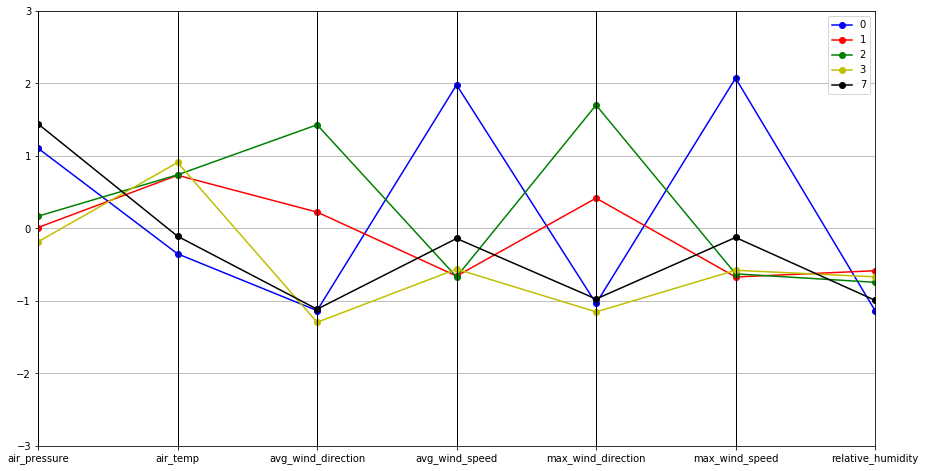

In [24]:
# Dry Days

parallel_plot(P[P['relative_humidity'] < -0.5])

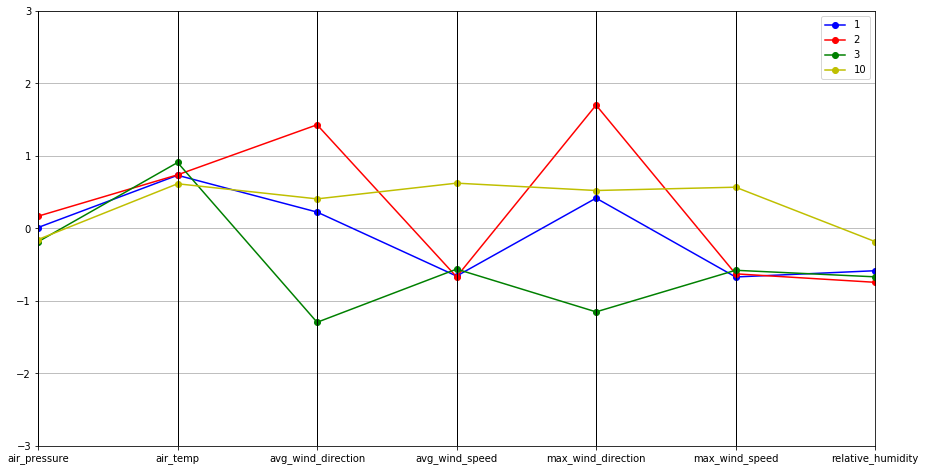

In [25]:
# Warm Days

parallel_plot(P[P['air_temp'] > 0.5])

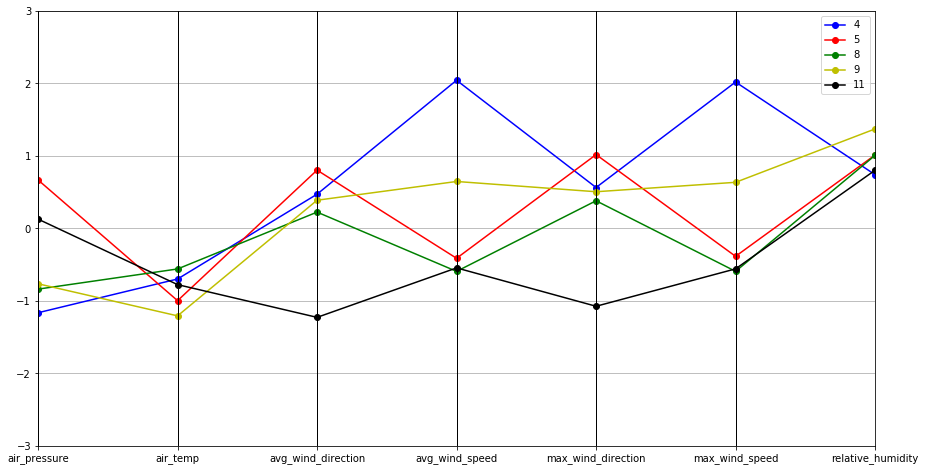

In [26]:
# Cool Days

parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])